In [ ]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [ ]:
pip install pad_sequence

ERROR: Could not find a version that satisfies the requirement pad_sequence (from versions: none)
ERROR: No matching distribution found for pad_sequence


In [ ]:
d=pd.read_csv('/content/drive/MyDrive/model1/ta-en-misogyny-train.csv')
d

FileNotFoundError: ignored

# New Section

In [ ]:
f=pd.read_csv('/content/drive/MyDrive/model1/ta-en_test_without_labels.csv')
f

,ante peddi yedukkure ponnai vacci panam sambatikkuraange
0,Yella idangalilum pengalai asinga paduthuvathe...
1,Pannikku porandha paradhesi H Raja... Ponna pu...
2,Ayya white T-shirt! Tamil culture pathi mulusa...
3,Madu vandhi bjb fraudulent lady
4,புரட்சியாளன் சுபா deiii sarakku midukku nnu p...
...,...
1851,Avanga sonanga pari 8:50 sema
1852,Bro Avanga great bro semma character antha akk...
1853,NAGENDRAN NAGA hii Ur watsapp number
1854,Nengal solvathu sari endral angalum kuda vethi...


In [ ]:
e=pd.read_csv('/content/drive/MyDrive/model1/ta-en-misogyny-dev.csv')
e

,label
0,Counter-speech Halo first ayunga k...
1,None-of-the-above\tHello...... manithana sollu...
2,Xenophobia\tChina kaaranai nalla kalaipan dail...
3,None-of-the-above\tOnnota ponnu ipdi Panna vit...
4,None-of-the-above\tVinothkumar Vinoth varalam...
...,...
1482,Transphobic\tVa d 9 usu vinoth
1483,None-of-the-above\tLove panuradhaaaa soliyaeee...
1484,None-of-the-above\tBro part 2 aippa varum
1485,Misandry\tjii innum nariya thetunga andha pott...


In [ ]:
dd=pd.DataFrame(e)
dd

,label
0,Counter-speech Halo first ayunga k...
1,None-of-the-above\tHello...... manithana sollu...
2,Xenophobia\tChina kaaranai nalla kalaipan dail...
3,None-of-the-above\tOnnota ponnu ipdi Panna vit...
4,None-of-the-above\tVinothkumar Vinoth varalam...
...,...
1482,Transphobic\tVa d 9 usu vinoth
1483,None-of-the-above\tLove panuradhaaaa soliyaeee...
1484,None-of-the-above\tBro part 2 aippa varum
1485,Misandry\tjii innum nariya thetunga andha pott...


In [ ]:
dd.columns

Index(['label'], dtype='object')

In [ ]:
dd[['label','comments']]=dd['label'].apply(lambda x: pd.Series(x.split('\t',1)))
dd.head(20)

,label,comments
0,Counter-speech Halo first ayunga k...,NaN
1,None-of-the-above,Hello...... manithana sollunga.......... prama...
2,Xenophobia,China kaaranai nalla kalaipan daily I am enjoy...
3,None-of-the-above,Onnota ponnu ipdi Panna vituviya
4,None-of-the-above,Vinothkumar Vinoth varalam ellamey va nenga! ...
5,Misandry,புரட்சியாளன் சுபா son...ipdila sollapidadhu.....
6,None-of-the-above,Vera11 thalaiva i love U 😍😍😍❤
7,None-of-the-above,dei thermakolu neyelam y da uyiroda iruka...
8,None-of-the-above,hehehehe ...... na ennn fell pandran .... i ha...
9,None-of-the-above,Superpppppp semmaya pesarenga ; Azagaa erukingaaa


In [ ]:
dd['label'].value_counts()

None-of-the-above                                                                                                                                              918
Misandry                                                                                                                                                       218
Counter-speech                                                                                                                                                  94
Xenophobia                                                                                                                                                      70
Hope-Speech                                                                                                                                                     53
Misogyny                                                                                                                                                        50
Homophobia            

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.DataFrame(d)
df

,label,comments
0,None-of-the-above\t enaku unmaiku...,NaN
1,Transphobic\t SUPERSTAR VIJAY ...,NaN
2,None-of-the-above\t Ugka smile cute a iruku😊...,NaN
3,None-of-the-above\t Anna i am waiting na 🥰🥰🥰,NaN
4,None-of-the-above\t Yanda tamilnadu la evval...,NaN
...,...,...
5943,None-of-the-above\tNoq day having no caste no ...,NaN
5944,None-of-the-above\tMimicry escape aitaru bro. 😂,NaN
5945,None-of-the-above\tRajesh R u age u from,NaN
5946,Counter-speech\tBro unga videos nallarukku but...,NaN


In [ ]:
dfs=pd.DataFrame(f)

In [ ]:
df[['label','comments']]=df['label'].apply(lambda x: pd.Series(x.split('\t',1)))
df.head(20)

,label,comments
0,None-of-the-above,enaku unmaikum aluha wantu thiru...
1,Transphobic,SUPERSTAR VIJAY dai arivukett...
2,None-of-the-above,Ugka smile cute a iruku😊😊...
3,None-of-the-above,Anna i am waiting na 🥰🥰🥰
4,None-of-the-above,Yanda tamilnadu la evvalavo pirachana iruku...
5,Transphobic,Night fulla mater ku alaiurad...
6,None-of-the-above,l v innum konja varshathula yaaru agadhi ...
7,None-of-the-above,Bala kumar wat ur asking.? 1st olunga ke...
8,None-of-the-above,Unaku aids vandhuruchi pola olunga iru...
9,Counter-speech,pradeep kodi per iruka maataanga nu...


In [ ]:
lab=['label']
dfs.columns=lab
dfs

,label
0,Yella idangalilum pengalai asinga paduthuvathe...
1,Pannikku porandha paradhesi H Raja... Ponna pu...
2,Ayya white T-shirt! Tamil culture pathi mulusa...
3,Madu vandhi bjb fraudulent lady
4,புரட்சியாளன் சுபா deiii sarakku midukku nnu p...
...,...
1851,Avanga sonanga pari 8:50 sema
1852,Bro Avanga great bro semma character antha akk...
1853,NAGENDRAN NAGA hii Ur watsapp number
1854,Nengal solvathu sari endral angalum kuda vethi...


In [ ]:
df['label'].value_counts()

None-of-the-above    3720
Misandry              830
Counter-speech        347
Xenophobia            297
Hope-Speech           213
Misogyny              211
Homophobia            172
Transphobic           157
Counter-speech          1
Name: label, dtype: int64

In [ ]:
def clean_text(df,text_data):
  df[text_data]=df[text_data].apply(lambda x:  re.sub(r'[^a-zA-Z0-9\s]', '', x))
  return df
train_data=clean_text(df,'comments')
test_data=clean_text(dfs,'label')

In [ ]:
train_data

,label,comments
0,None-of-the-above,enaku unmaikum aluha wantu thiru...
1,Transphobic,SUPERSTAR VIJAY dai arivukett...
2,None-of-the-above,Ugka smile cute a iruku
3,None-of-the-above,Anna i am waiting na
4,None-of-the-above,Yanda tamilnadu la evvalavo pirachana iruku...
...,...,...
5943,None-of-the-above,Noq day having no caste no religious certificate
5944,None-of-the-above,Mimicry escape aitaru bro
5945,None-of-the-above,Rajesh R u age u from
5946,Counter-speech,Bro unga videos nallarukku but dont do prank b...


In [ ]:
test_data

,label
0,Yella idangalilum pengalai asinga paduthuvathe...
1,Pannikku porandha paradhesi H Raja Ponna punda...
2,Ayya white Tshirt Tamil culture pathi mulusa p...
3,Madu vandhi bjb fraudulent lady
4,deiii sarakku midukku nnu pesnadhu naangala...
...,...
1851,Avanga sonanga pari 850 sema
1852,Bro Avanga great bro semma character antha akk...
1853,NAGENDRAN NAGA hii Ur watsapp number
1854,Nengal solvathu sari endral angalum kuda vethi...


In [ ]:
train_data.isna().any()
df1=train_data

In [ ]:
label_encoder = LabelEncoder()
df1['tokenize_tabel']=label_encoder.fit_transform(df1['label'])
df1

,label,comments,tokenize_tabel
0,None-of-the-above,enaku unmaikum aluha wantu thiru...,6
1,Transphobic,SUPERSTAR VIJAY dai arivukett...,7
2,None-of-the-above,Ugka smile cute a iruku,6
3,None-of-the-above,Anna i am waiting na,6
4,None-of-the-above,Yanda tamilnadu la evvalavo pirachana iruku...,6
...,...,...,...
5943,None-of-the-above,Noq day having no caste no religious certificate,6
5944,None-of-the-above,Mimicry escape aitaru bro,6
5945,None-of-the-above,Rajesh R u age u from,6
5946,Counter-speech,Bro unga videos nallarukku but dont do prank b...,0


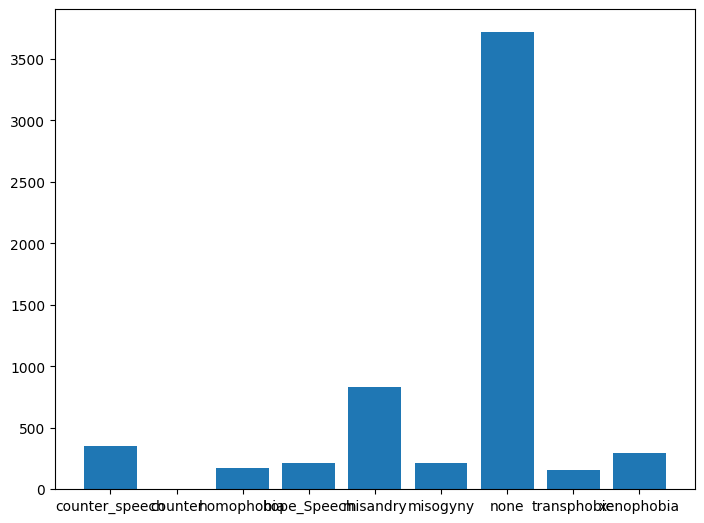

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['counter_speech',   'counter',   'homophobia',   'hope_Speech',   'misandry',   'misogyny',   'none',   'transphobic',   'xenophobia']
data=[len(df1[df1.tokenize_tabel==0]),len(df1[df1.tokenize_tabel==1]),len(df1[df1.tokenize_tabel==2]),len(df1[df1.tokenize_tabel==3]),len(df1[df1.tokenize_tabel==4]),len(df1[df1.tokenize_tabel==5]),len(df1[df1.tokenize_tabel==6]),len(df1[df1.tokenize_tabel==7]),len(df1[df1.tokenize_tabel==8])]
ax.bar(langs,data)
plt.show()

In [ ]:
'''vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['comments'])'''



In [ ]:
x_train, x_test, y_train, y_test= train_test_split(df1['comments'],df1['label'], test_size=0.2, random_state=42)


In [ ]:
'''oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train.to_frame(), y_train)'''

In [ ]:


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)


In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

   Counter-speech       0.62      0.14      0.23        71
       Homophobia       0.67      0.21      0.32        29
      Hope-Speech       1.00      0.02      0.04        47
         Misandry       0.75      0.53      0.62       167
         Misogyny       0.75      0.23      0.35        40
None-of-the-above       0.72      0.97      0.83       737
      Transphobic       0.33      0.04      0.07        25
       Xenophobia       0.97      0.49      0.65        74

         accuracy                           0.73      1190
        macro avg       0.73      0.33      0.39      1190
     weighted avg       0.74      0.73      0.68      1190



AttributeError: ignored

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)


In [ ]:
pipeline = Pipeline([
    ('classifier', MultinomialNB())
])

pipeline.fit(x_train, y_train)
y_predict = pipeline.predict(x_test)
print(classification_report(y_test, y_predict))






                   precision    recall  f1-score   support

   Counter-speech       0.00      0.00      0.00        71
       Homophobia       0.00      0.00      0.00        29
      Hope-Speech       0.00      0.00      0.00        47
         Misandry       0.82      0.14      0.24       167
         Misogyny       0.00      0.00      0.00        40
None-of-the-above       0.63      1.00      0.78       737
      Transphobic       0.00      0.00      0.00        25
       Xenophobia       0.00      0.00      0.00        74

         accuracy                           0.64      1190
        macro avg       0.18      0.14      0.13      1190
     weighted avg       0.51      0.64      0.51      1190



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test,y_predict,average='macro')

0.319194986194722

In [ ]:
f1_score(y_test,y_predict,average='weighted')

0.644679276210909

In [ ]:
from sklearn.metrics import accuracy_score

clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)


Accuracy: 0.711764705882353


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_predict,average='micro')
print("Precision:", precision)


Precision: 0.711764705882353


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_predict,average='macro')
print("Precision:", precision)

Precision: 0.8225084858013213


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_predict,average='weighted')
print("Precision:", precision)

Precision: 0.7507223082753758


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predict,average='micro')
print("Recall:", recall)


Recall: 0.711764705882353


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predict,average='macro')
print("Recall:", recall)


Recall: 0.2716891156331934


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predict,average='weighted')
print("Recall:", recall)

Recall: 0.711764705882353


In [ ]:
new_text_vectorized = vectorizer.transform(test_data['label'])
prediction = clf.predict(new_text_vectorized)
test_data['predicted']=prediction






In [ ]:
test_data

,label,predicted
0,Yella idangalilum pengalai asinga paduthuvathe...,None-of-the-above
1,Pannikku porandha paradhesi H Raja Ponna punda...,Misandry
2,Ayya white Tshirt Tamil culture pathi mulusa p...,None-of-the-above
3,Madu vandhi bjb fraudulent lady,None-of-the-above
4,deiii sarakku midukku nnu pesnadhu naangala...,Misandry
...,...,...
1851,Avanga sonanga pari 850 sema,None-of-the-above
1852,Bro Avanga great bro semma character antha akk...,None-of-the-above
1853,NAGENDRAN NAGA hii Ur watsapp number,None-of-the-above
1854,Nengal solvathu sari endral angalum kuda vethi...,None-of-the-above


In [ ]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
import gspread
from google.auth import default
creds, _=default()

gs=gspread.authorize(creds)

sh=gs.create('predicted_comments')

worksheet=gs.open('predicted_comments').sheet1

cell_list=worksheet.range('A1:E5')

ddf=pd.DataFrame(test_data)

worksheet.update([ddf.columns.tolist()]+ddf.values.tolist())


{'spreadsheetId': '19qJxWnaP7fnL5TRgjSq5yOLpQe-CpuVOMJJwWq7PsJQ',
 'updatedRange': 'Sheet1!A1:B1857',
 'updatedRows': 1857,
 'updatedColumns': 2,
 'updatedCells': 3714}